In [3]:
#Importing Libraries
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
plt.rcParams["font.family"] = "Arial"

#Loading Data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_da_us= df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

In [5]:
df_plot= df_da_us['job_location'].value_counts().head(10).to_frame()

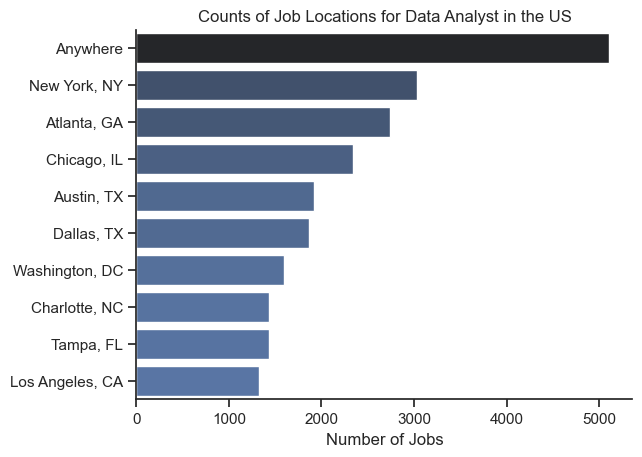

In [6]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


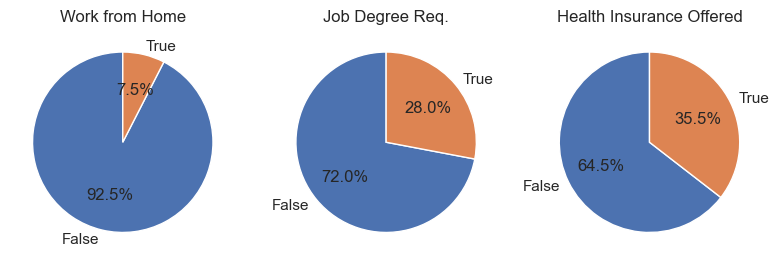

In [7]:
dict_column= {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

fig,ax= plt.subplots(1,3,figsize=(8, 6))

for i, (column,header) in enumerate(dict_column.items()):
    ax[i].pie(df_da_us[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(header)
plt.tight_layout()
plt.show()

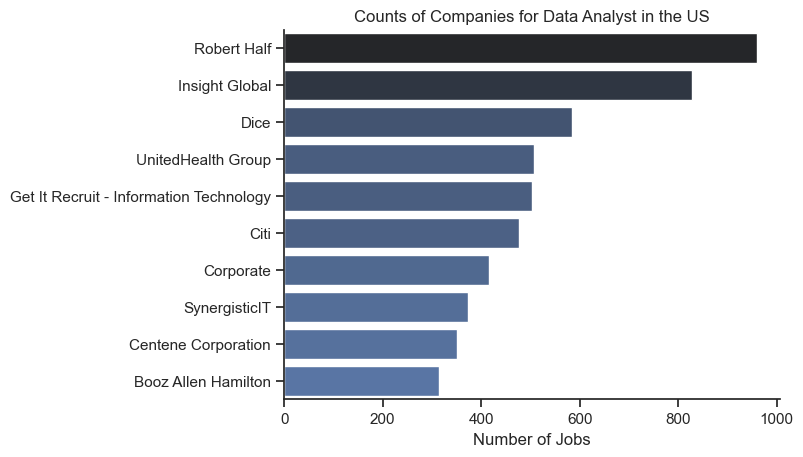

In [8]:
df_plot= df_da_us['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()